## Explaining the MNIST dataset 
- The MNIST image is a popular public dataset that is made up of numbers 0-9
- Each number is in a box of dimensions 28x28, the entire image is made up of small boxes of numbers
- If you google MNIST dataset you will get the picture
- It is a black and white image hence 1 dimensional
- The dataset has a column with the class each number belongs to 0-9
- And 784 columns representing the 784 pixels per image
- Each row represents a number from 0-9 made up of 784 pixels
- Since this is a black and white image the pixels have greyscale intensity values of 0-255 0 being black and 255 white

In [37]:
import numpy as np #as we are working with matrices, reshaping data
import pandas as pd #will load a csv file, delete columns, view columns
import keras
from keras import layers #To define and stack layers, dense, conv2d, dropout, fully connected
from keras.utils import to_categorical #Converts class labels (e.g., 0, 1, 2) into one-hot encoded vectors
from sklearn.model_selection import train_test_split #Splits your dataset into training and testing (or validation) sets

## Load the dataset 

In [8]:
df = pd.read_csv('mnist.csv')

## Data exploration

In [9]:
df.head(3)

,id,class,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,31953,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,34452,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,60897,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Columns: 786 entries, id to pixel784
dtypes: int64(786)
memory usage: 24.0 MB


In [15]:
df.shape

(4000, 786)

## Split the dataset

In [17]:
num_classes=10
input_shape=(28,28,1)

In [19]:
x = df.drop(columns=['id', 'class']).values
y = df['class'].values

In [21]:
print(y[0:3])

[5 8 5]


In [23]:
print(x[0:1])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0  26 121 109   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  29 209
  253 252 107 108  57   0   0   0  86 108 108  97   0   0   0   0   0   0
    0   0   0   0   0   0   0   0  68 253 253 243 151 253 242 228 228 228
  248 253 253 250 228 228   0   0   0   0   0   0   0   0   0   0   0  69
  225 253 219  35  10 173 212 253 253 

### Re-Shaping

In [25]:
x = x.reshape(-1, 28, 28, 1).astype('float32') / 255
y = to_categorical(y, num_classes=10)#encoded labels 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [27]:
print(y[0:3])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


In [29]:
print(x[0:1])

[[[[0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [

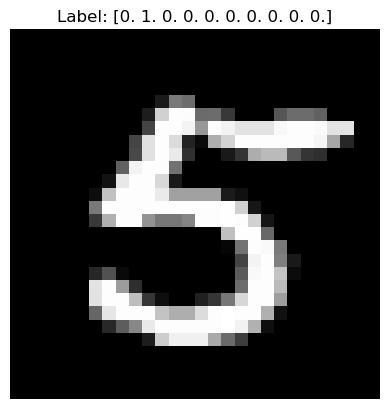

In [31]:
import matplotlib.pyplot as plt
image = x[0].reshape(-28, 28)  # Reshape the first image in X_train

# Step 2: Display the image
plt.imshow(image, cmap='gray')  # 'gray' for grayscale
plt.title(f'Label: {y_train[0]}')  # Display the label of the first image
plt.axis('off')  # Hide axes for cleaner display
plt.show()

In [39]:
model = keras.Sequential([
    keras.Input(shape=input_shape),
    layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.BatchNormalization(),
    layers.Dense(num_classes, activation="softmax"),
    
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 1600)                │           6,400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │          16,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 41,226 (161.04 KB)

 Trainable params: 38,026 (148.54 KB)

 Non-trainable params: 3,200 (12.50 KB)

In [41]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

batch_size = 128
epochs = 10
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.3962 - loss: 1.8343 - val_accuracy: 0.5906 - val_loss: 1.9952
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.8548 - loss: 0.5081 - val_accuracy: 0.6531 - val_loss: 1.8337
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9016 - loss: 0.2953 - val_accuracy: 0.7281 - val_loss: 1.7113
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9342 - loss: 0.2140 - val_accuracy: 0.7563 - val_loss: 1.5983
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9646 - loss: 0.1478 - val_accuracy: 0.7625 - val_loss: 1.4479
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9584 - loss: 0.1378 - val_accuracy: 0.8438 - val_loss: 1.3109
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9741 - loss: 0.1042 - val_accuracy: 0.9031 - val_loss: 1.1972
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9675 - loss: 0.1136 - val_accuracy: 0.9281 - v

In [43]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test loss: {test_loss}, Test accuracy: {test_accuracy}")

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9583 - loss: 0.7684
Test loss: 0.7908444404602051, Test accuracy: 0.9524999856948853
